In [14]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [15]:
# --- 1. Préparation des données ---
base_dir = "data"
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,  # Augmenter la rotation
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    base_dir, target_size=(224, 224), batch_size=32, class_mode='categorical', subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    base_dir, target_size=(224, 224), batch_size=32, class_mode='categorical', subset='validation'
)
test_generator = test_datagen.flow_from_directory(
    base_dir, target_size=(224, 224), batch_size=32, class_mode='categorical', shuffle=False
)

Found 8126 images belonging to 3 classes.
Found 2029 images belonging to 3 classes.
Found 10155 images belonging to 3 classes.


In [16]:

# --- 2. Modèle MobileNetV2 ---
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Geler les poids du modèle de base

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dense(1024, activation='relu')(x)  # Augmenter la taille de la couche dense
x = Dropout(0.5)(x)  # Augmenter dropout
x = Dense(512, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [17]:
# --- 3. Compilation ---
model.compile(optimizer=Adam(learning_rate=0.0001),  # Utiliser Adam classique
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
# --- 4. Callbacks ---
checkpoint = ModelCheckpoint("best1_model.h5", monitor="val_loss", save_best_only=True, mode="min", verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, verbose=1, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

In [20]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=[checkpoint, reduce_lr, early_stopping],
    verbose=1
)

Epoch 1/30
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4641 - loss: 1.1745
Epoch 1: val_loss improved from inf to 0.78800, saving model to best1_model.h5


254/254 ━━━━━━━━━━━━━━━━━━━━ 352s 1s/step - accuracy: 0.4644 - loss: 1.1739 - val_accuracy: 0.6644 - val_loss: 0.7880 - learning_rate: 1.0000e-04
Epoch 2/30
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 899ms/step - accuracy: 0.6387 - loss: 0.8354
Epoch 2: val_loss improved from 0.78800 to 0.74196, saving model to best1_model.h5


254/254 ━━━━━━━━━━━━━━━━━━━━ 286s 1s/step - accuracy: 0.6388 - loss: 0.8352 - val_accuracy: 0.6698 - val_loss: 0.7420 - learning_rate: 1.0000e-04
Epoch 3/30
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 861ms/step - accuracy: 0.6960 - loss: 0.7001
Epoch 3: val_loss improved from 0.74196 to 0.70785, saving model to best1_model.h5


254/254 ━━━━━━━━━━━━━━━━━━━━ 276s 1s/step - accuracy: 0.6960 - loss: 0.7000 - val_accuracy: 0.7117 - val_loss: 0.7078 - learning_rate: 1.0000e-04
Epoch 4/30
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 921ms/step - accuracy: 0.7244 - loss: 0.6523
Epoch 4: val_loss improved from 0.70785 to 0.66082, saving model to best1_model.h5


254/254 ━━━━━━━━━━━━━━━━━━━━ 293s 1s/step - accuracy: 0.7245 - loss: 0.6522 - val_accuracy: 0.7260 - val_loss: 0.6608 - learning_rate: 1.0000e-04
Epoch 5/30
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7426 - loss: 0.6111
Epoch 5: val_loss did not improve from 0.66082
254/254 ━━━━━━━━━━━━━━━━━━━━ 319s 1s/step - accuracy: 0.7426 - loss: 0.6111 - val_accuracy: 0.7132 - val_loss: 0.6669 - learning_rate: 1.0000e-04
Epoch 6/30
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 912ms/step - accuracy: 0.7529 - loss: 0.5828
Epoch 6: val_loss did not improve from 0.66082
254/254 ━━━━━━━━━━━━━━━━━━━━ 301s 1s/step - accuracy: 0.7529 - loss: 0.5827 - val_accuracy: 0.7324 - val_loss: 0.6625 - learning_rate: 1.0000e-04
Epoch 7/30
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7645 - loss: 0.5652
Epoch 7: val_loss did not improve from 0.66082

Epoch 7: ReduceLROnPlateau reducing learning rate to 2.9999999242136255e-05.
254/254 ━━━━━━━━━━━━━━━━━━━━ 334s 1s/step - accuracy: 0.7645 - loss: 0.5652 - val_acc

254/254 ━━━━━━━━━━━━━━━━━━━━ 336s 1s/step - accuracy: 0.7730 - loss: 0.5466 - val_accuracy: 0.7437 - val_loss: 0.6288 - learning_rate: 3.0000e-05
Epoch 9/30
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7718 - loss: 0.5357
Epoch 9: val_loss did not improve from 0.62882
254/254 ━━━━━━━━━━━━━━━━━━━━ 318s 1s/step - accuracy: 0.7718 - loss: 0.5357 - val_accuracy: 0.7196 - val_loss: 0.6654 - learning_rate: 3.0000e-05
Epoch 10/30
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7800 - loss: 0.5268
Epoch 10: val_loss improved from 0.62882 to 0.61721, saving model to best1_model.h5


254/254 ━━━━━━━━━━━━━━━━━━━━ 379s 1s/step - accuracy: 0.7800 - loss: 0.5268 - val_accuracy: 0.7590 - val_loss: 0.6172 - learning_rate: 3.0000e-05
Epoch 11/30
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 996ms/step - accuracy: 0.7780 - loss: 0.5210
Epoch 11: val_loss did not improve from 0.61721
254/254 ━━━━━━━━━━━━━━━━━━━━ 315s 1s/step - accuracy: 0.7780 - loss: 0.5210 - val_accuracy: 0.7437 - val_loss: 0.6218 - learning_rate: 3.0000e-05
Epoch 12/30
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7904 - loss: 0.5066
Epoch 12: val_loss did not improve from 0.61721
254/254 ━━━━━━━━━━━━━━━━━━━━ 341s 1s/step - accuracy: 0.7904 - loss: 0.5066 - val_accuracy: 0.7373 - val_loss: 0.6381 - learning_rate: 3.0000e-05
Epoch 13/30
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 958ms/step - accuracy: 0.7872 - loss: 0.5052
Epoch 13: val_loss did not improve from 0.61721

Epoch 13: ReduceLROnPlateau reducing learning rate to 8.999999772640877e-06.
254/254 ━━━━━━━━━━━━━━━━━━━━ 310s 1s/step - accuracy: 0.7873 - loss: 0.5051 

254/254 ━━━━━━━━━━━━━━━━━━━━ 266s 1s/step - accuracy: 0.7866 - loss: 0.5075 - val_accuracy: 0.7698 - val_loss: 0.5702 - learning_rate: 9.0000e-06
Epoch 16/30
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 806ms/step - accuracy: 0.7859 - loss: 0.4942
Epoch 16: val_loss did not improve from 0.57022
254/254 ━━━━━━━━━━━━━━━━━━━━ 257s 1s/step - accuracy: 0.7859 - loss: 0.4942 - val_accuracy: 0.7486 - val_loss: 0.6248 - learning_rate: 9.0000e-06
Epoch 17/30
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 817ms/step - accuracy: 0.7927 - loss: 0.4964
Epoch 17: val_loss did not improve from 0.57022
254/254 ━━━━━━━━━━━━━━━━━━━━ 259s 1s/step - accuracy: 0.7927 - loss: 0.4964 - val_accuracy: 0.7605 - val_loss: 0.6044 - learning_rate: 9.0000e-06
Epoch 18/30
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 811ms/step - accuracy: 0.7942 - loss: 0.4985
Epoch 18: val_loss did not improve from 0.57022

Epoch 18: ReduceLROnPlateau reducing learning rate to 2.6999998226528985e-06.
254/254 ━━━━━━━━━━━━━━━━━━━━ 256s 1s/step - accuracy: 0.7942 - loss: 0.4

In [21]:
# Sauvegarde du modèle final
model.save('model6.h5')

In [22]:

# Evaluate on test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc:.4f}')

318/318 ━━━━━━━━━━━━━━━━━━━━ 163s 513ms/step - accuracy: 0.8237 - loss: 0.3872
Test Accuracy: 0.8539


In [23]:
# --- 6. Fine-Tuning ---
base_model.trainable = True  # Débloquer toutes les couches
for layer in base_model.layers[:100]:
    layer.trainable = False  # Ne débloquer que les couches hautes

model.compile(optimizer=Adam(learning_rate=1e-5),  # Réduire le taux d'apprentissage
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_finetune = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[checkpoint, reduce_lr, early_stopping],
    verbose=1
)

Epoch 1/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6594 - loss: 0.7986
Epoch 1: val_loss did not improve from 0.57022
254/254 ━━━━━━━━━━━━━━━━━━━━ 347s 1s/step - accuracy: 0.6595 - loss: 0.7984 - val_accuracy: 0.7373 - val_loss: 0.6804 - learning_rate: 1.0000e-05
Epoch 2/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7474 - loss: 0.6150
Epoch 2: val_loss did not improve from 0.57022
254/254 ━━━━━━━━━━━━━━━━━━━━ 302s 1s/step - accuracy: 0.7474 - loss: 0.6148 - val_accuracy: 0.7324 - val_loss: 0.6676 - learning_rate: 1.0000e-05
Epoch 3/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7704 - loss: 0.5400
Epoch 3: val_loss did not improve from 0.57022
254/254 ━━━━━━━━━━━━━━━━━━━━ 302s 1s/step - accuracy: 0.7705 - loss: 0.5399 - val_accuracy: 0.7708 - val_loss: 0.5972 - learning_rate: 1.0000e-05
Epoch 4/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7985 - loss: 0.4961
Epoch 4: val_loss improved from 0.57022 to 0.51458, saving model to best1_model.h

254/254 ━━━━━━━━━━━━━━━━━━━━ 306s 1s/step - accuracy: 0.7985 - loss: 0.4959 - val_accuracy: 0.7999 - val_loss: 0.5146 - learning_rate: 1.0000e-05
Epoch 5/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8223 - loss: 0.4343
Epoch 5: val_loss did not improve from 0.51458
254/254 ━━━━━━━━━━━━━━━━━━━━ 307s 1s/step - accuracy: 0.8223 - loss: 0.4342 - val_accuracy: 0.8063 - val_loss: 0.5190 - learning_rate: 1.0000e-05
Epoch 6/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8435 - loss: 0.3982
Epoch 6: val_loss improved from 0.51458 to 0.44816, saving model to best1_model.h5


254/254 ━━━━━━━━━━━━━━━━━━━━ 306s 1s/step - accuracy: 0.8435 - loss: 0.3982 - val_accuracy: 0.8275 - val_loss: 0.4482 - learning_rate: 1.0000e-05
Epoch 7/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8477 - loss: 0.3694
Epoch 7: val_loss improved from 0.44816 to 0.42055, saving model to best1_model.h5


254/254 ━━━━━━━━━━━━━━━━━━━━ 305s 1s/step - accuracy: 0.8477 - loss: 0.3695 - val_accuracy: 0.8354 - val_loss: 0.4206 - learning_rate: 1.0000e-05
Epoch 8/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8436 - loss: 0.3700
Epoch 8: val_loss improved from 0.42055 to 0.41038, saving model to best1_model.h5


254/254 ━━━━━━━━━━━━━━━━━━━━ 303s 1s/step - accuracy: 0.8437 - loss: 0.3700 - val_accuracy: 0.8433 - val_loss: 0.4104 - learning_rate: 1.0000e-05
Epoch 9/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 988ms/step - accuracy: 0.8628 - loss: 0.3399
Epoch 9: val_loss improved from 0.41038 to 0.37526, saving model to best1_model.h5


254/254 ━━━━━━━━━━━━━━━━━━━━ 294s 1s/step - accuracy: 0.8628 - loss: 0.3399 - val_accuracy: 0.8645 - val_loss: 0.3753 - learning_rate: 1.0000e-05
Epoch 10/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 997ms/step - accuracy: 0.8717 - loss: 0.3252
Epoch 10: val_loss did not improve from 0.37526
254/254 ━━━━━━━━━━━━━━━━━━━━ 303s 1s/step - accuracy: 0.8718 - loss: 0.3251 - val_accuracy: 0.8561 - val_loss: 0.3877 - learning_rate: 1.0000e-05
Epoch 11/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8818 - loss: 0.2997
Epoch 11: val_loss improved from 0.37526 to 0.36290, saving model to best1_model.h5


254/254 ━━━━━━━━━━━━━━━━━━━━ 305s 1s/step - accuracy: 0.8818 - loss: 0.2997 - val_accuracy: 0.8615 - val_loss: 0.3629 - learning_rate: 1.0000e-05
Epoch 12/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8814 - loss: 0.2994
Epoch 12: val_loss improved from 0.36290 to 0.31667, saving model to best1_model.h5


254/254 ━━━━━━━━━━━━━━━━━━━━ 300s 1s/step - accuracy: 0.8815 - loss: 0.2993 - val_accuracy: 0.8822 - val_loss: 0.3167 - learning_rate: 1.0000e-05
Epoch 13/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8826 - loss: 0.2803
Epoch 13: val_loss improved from 0.31667 to 0.30849, saving model to best1_model.h5


254/254 ━━━━━━━━━━━━━━━━━━━━ 338s 1s/step - accuracy: 0.8826 - loss: 0.2803 - val_accuracy: 0.8857 - val_loss: 0.3085 - learning_rate: 1.0000e-05
Epoch 14/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8872 - loss: 0.2919
Epoch 14: val_loss improved from 0.30849 to 0.30746, saving model to best1_model.h5


254/254 ━━━━━━━━━━━━━━━━━━━━ 390s 2s/step - accuracy: 0.8872 - loss: 0.2918 - val_accuracy: 0.8871 - val_loss: 0.3075 - learning_rate: 1.0000e-05
Epoch 15/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8975 - loss: 0.2619
Epoch 15: val_loss did not improve from 0.30746
254/254 ━━━━━━━━━━━━━━━━━━━━ 354s 1s/step - accuracy: 0.8975 - loss: 0.2619 - val_accuracy: 0.8847 - val_loss: 0.3131 - learning_rate: 1.0000e-05
Epoch 16/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8972 - loss: 0.2560
Epoch 16: val_loss did not improve from 0.30746
254/254 ━━━━━━━━━━━━━━━━━━━━ 448s 2s/step - accuracy: 0.8972 - loss: 0.2560 - val_accuracy: 0.8753 - val_loss: 0.3228 - learning_rate: 1.0000e-05
Epoch 17/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9106 - loss: 0.2323
Epoch 17: val_loss did not improve from 0.30746

Epoch 17: ReduceLROnPlateau reducing learning rate to 2.9999999242136253e-06.
254/254 ━━━━━━━━━━━━━━━━━━━━ 387s 2s/step - accuracy: 0.9106 - loss: 0.2323 - val

In [24]:
# Sauvegarde du modèle final
model.save('model7.h5')

In [25]:

# --- 7. Évaluation ---
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc:.4f}')

318/318 ━━━━━━━━━━━━━━━━━━━━ 154s 484ms/step - accuracy: 0.9399 - loss: 0.1596
Test Accuracy: 0.9403


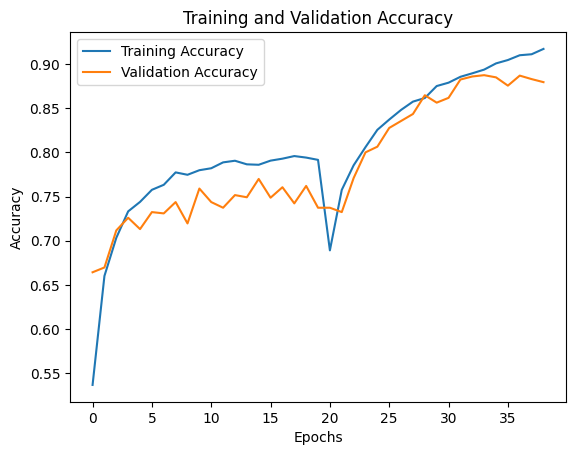

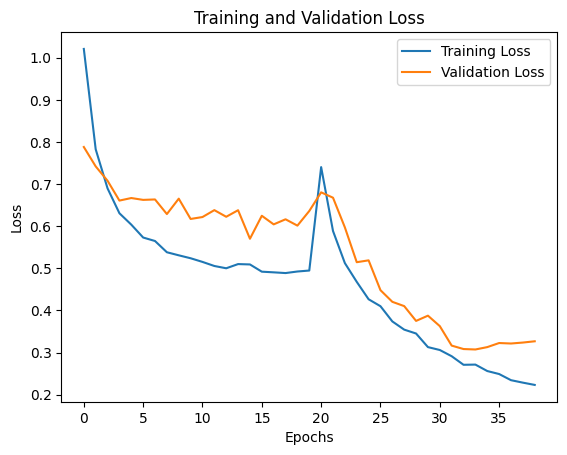

In [26]:
import matplotlib.pyplot as plt
# --- 8. Visualisation des performances ---
plt.plot(history.history['accuracy'] + history_finetune.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'] + history_finetune.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

plt.plot(history.history['loss'] + history_finetune.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'] + history_finetune.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [28]:
import cv2
import numpy as np
import tensorflow as tf

# Charger le modèle pré-entraîné
try:
    model = tf.keras.models.load_model('model7.h5')
except Exception as e:
    print(f"Erreur lors du chargement du modèle : {e}")
    exit()

# Dictionnaire des émotions
emotion_labels = ['Fatigue', 'tres fatigue', 'neutre']

# Ouvrir la caméra
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Erreur : Impossible d'ouvrir la caméra.")
    exit()

# Chargement du classificateur de visage
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
if face_cascade.empty():
    print("Erreur : Impossible de charger le classificateur de visage.")
    cap.release()
    exit()

last_face = None  # Stocker la dernière position du visage détecté

while True:
    ret, frame = cap.read()
    if not ret:
        print("Erreur : Problème lors de la capture de la vidéo.")
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    if len(faces) == 0 and last_face is not None:
        faces = [last_face]

    for (x, y, w, h) in faces:
        last_face = (x, y, w, h)
        padding = int(h * 0.5)  # Ajouter un padding autour du visage
        x1, y1 = max(x - padding, 0), max(y - padding, 0)
        x2, y2 = min(x + w + padding, frame.shape[1]), min(y + h + padding, frame.shape[0])

        face = frame[y1:y2, x1:x2]

        if face.shape[0] == 0 or face.shape[1] == 0:
            continue  # Éviter les erreurs de dimension

        face = cv2.resize(face, (224, 224))
        face = face.astype('float32') / 255.0
        face = np.expand_dims(face, axis=0)

        prediction = model.predict(face, verbose=0)
        emotion = emotion_labels[np.argmax(prediction[0])]

        cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)
        text_x = max(x1, 10)
        text_y = max(y1 - 10, 20)
        cv2.putText(frame, emotion, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    cv2.imshow("Détection d'émotions", frame)
    
    # Attendre 1 ms pour éviter une utilisation CPU excessive
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
